#Pertanya

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
df_house = pd.read_csv('housing_price_dataset.csv')
df_house.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [120]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_house, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose
train = train.sort_values('SquareFeet')
test = test.sort_values('Price')

X_train, X_test = train[['SquareFeet']], test[['SquareFeet']]
y_train, y_test = train['Price'], test['Price']

In [121]:
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

Text(0, 0.5, 'Harga')

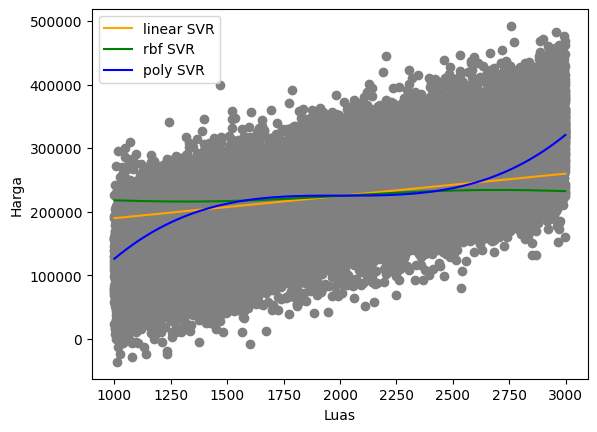

In [123]:
from matplotlib import pyplot as plt

#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['SquareFeet'], train['Price'], color = 'gray')
plt.plot(train['SquareFeet'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['SquareFeet'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['SquareFeet'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Luas')
plt.ylabel('Harga')

In [126]:
import numpy as np
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

r2: 0.33
rmse: 61940.15
